<a href="https://colab.research.google.com/github/josefernandezest98/training/blob/main/Gradient_Descent_Gompertz/gradient_descent_gompertz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import tensorflow as tf

| day | caliper |
|:---:|:---:|
| 1 | 10 |
| 2 | 11 |
| 3 | 12 |
| ... | ... |
| 33 | 86 |

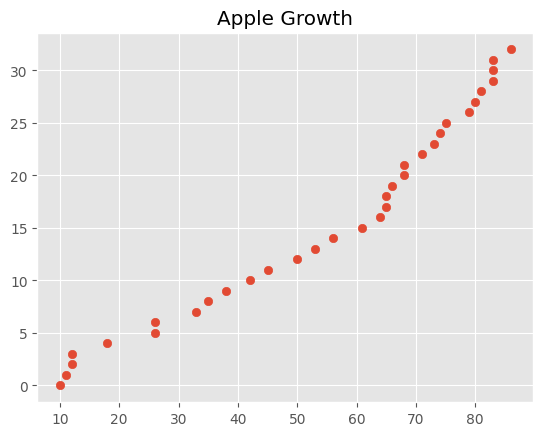

In [9]:
x = [10,11,12,12,18,26,26,33,35,38,42,45,50,
     53,56,61,64,65,65,66,68,68,71,73,74,75,
     79,80,81,83,83,83,86]
y = list(range(len(x)))

plt.scatter(x,y)
plt.title('Apple Growth')
plt.show()

**Gompertz**

The Gompertz curve or Gompertz function is a type of mathematical model for a time series, named after Benjamin Gompertz (1779–1865). It is a sigmoid function which describes growth as being slowest at the start and end of a given time period. The right-side or future value asymptote of the function is approached much more gradually by the curve than the left-side or lower valued asymptote. This is in contrast to the simple logistic function in which both asymptotes are approached by the curve symmetrically. It is a special case of the generalised logistic function. The function was originally designed to describe human mortality, but since has been modified to be applied in biology, with regard to detailing populations. The Gompertz formula is

$$f\left(t\right) = b_0 e^{-b_1 e^{-b_2 t}},$$

where:

*  $b_0$ is an asymptote, since $\lim_{t\to\infty} b_0 e^{-b_1 e^{-b_2 t}} = b_0 e^0 = b_0.$
*  $b_1$ sets the displacement along the x-axis.
*  $b_2$ sets the growth rate (*y* scaling).
*  $e$ is Euler´s Number $e \approx 2.71828\dots$

Let´s see an example of Gompertz function.

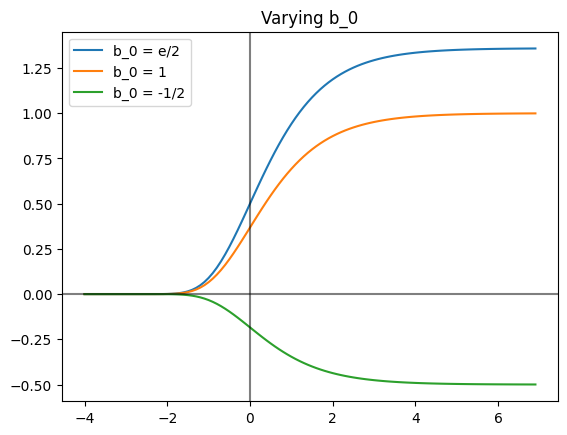

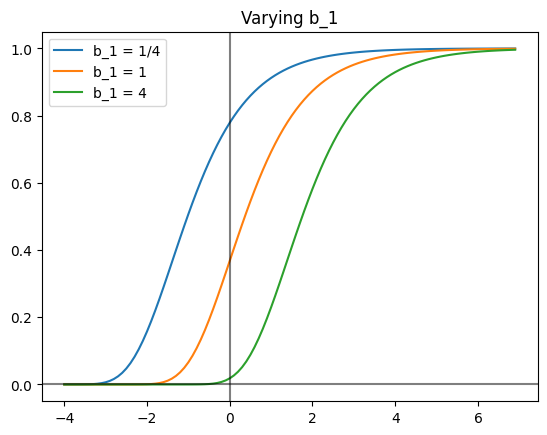

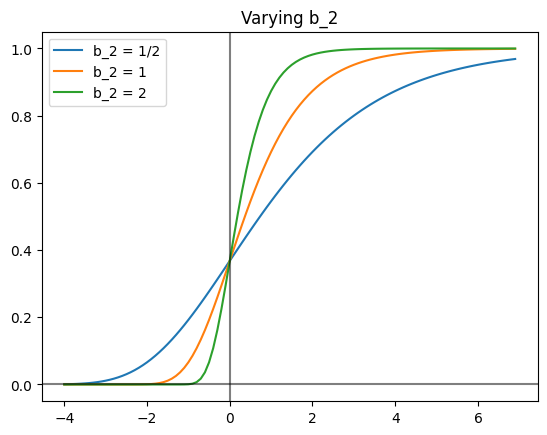

In [5]:
def f(t,b_0,b_1,b_2):
  return b_0*np.exp(-b_1*np.exp(-b_2*t))

t = np.array([0.1*i for i in range(-40,70)])

# Varying b_0
plt.plot(t,f(t,np.exp(1)/2,1,1),label='b_0 = e/2')
plt.plot(t,f(t,1,1,1),label='b_0 = 1')
plt.plot(t,f(t,-1/2,1,1),label='b_0 = -1/2')
plt.axvline(x = 0, color = 'black', alpha = 0.5)
plt.axhline(y = 0, color = 'black', alpha = 0.5)
plt.legend()
plt.title('Varying b_0')
plt.show()

# Varying b_1
plt.plot(t,f(t,1,1/4,1),label='b_1 = 1/4')
plt.plot(t,f(t,1,1,1),label='b_1 = 1')
plt.plot(t,f(t,1,4,1),label='b_1 = 4')
plt.axvline(x = 0, color = 'black', alpha = 0.5)
plt.axhline(y = 0, color = 'black', alpha = 0.5)
plt.legend()
plt.title('Varying b_1')
plt.show()

# Varying b_2
plt.plot(t,f(t,1,1,1/2),label='b_2 = 1/2')
plt.plot(t,f(t,1,1,1),label='b_2 = 1')
plt.plot(t,f(t,1,1,2),label='b_2 = 2')
plt.axvline(x = 0, color = 'black', alpha = 0.5)
plt.axhline(y = 0, color = 'black', alpha = 0.5)
plt.legend()
plt.title('Varying b_2')
plt.show()

**GADA**

The generalized algebraic difference approach (GADA) uses both: two-dimensional functions of explicit time and two-dimensional functions of explicit site to derive a single dynamic equation that is a three-dimensional function of explicit time and implicit site. In this case, we increase the dimension of the equation and reduce the dependence of the initial value $y_0$. Gompertz function in GADA derivation yields

$$f\left(t_0,y_0,t,b_0,b_1,b_2\right) = b_0 e^{\left[ \left(\frac{\log\left(\frac{y_0}{b_0}\right)}{e^{b_2 t_0}}\right)e^{b_1 t} \right]}.$$

This step will not be proved, but it consists of isolating the parameter $b_1$ in polymorphic shape. For further information go to the bibliography referenced in [9] and [10]. This is the equation we are going to fit with deep learning.

In [ ]:
# Gompertz function
def f_gompertz(tupla,b1,b2):
   y = b1*tf.math.exp((tf.math.log(tupla[1]/b1)/tf.math.exp(-b2*tupla[0]))*tf.math.exp(-b2*tupla[2]))
   return y

# Gompertz class
class gompertz(tf.Module): # default params (1.0,1.0,1.0)

  def __init__(self, params, **kwargs): # Builder
        super().__init__(**kwargs)
        self.b1 = tf.Variable(params[0],name='b1',trainable=True,dtype=tf.float32)
        self.b2 = tf.Variable(params[1],name='b2',trainable=True,dtype=tf.float32)

  def __call__(self, tupla): # Caller
        return f_gompertz(tupla, self.b1, self.b2)

  def get_variables(self): # Returns params of the model in variable mode
      b1 = self.b1
      b2 = self.b2
      params = (b1,b2)
      return params

  def get_constants(self): # Returns params of the model in constant mode
        b1 = tf.constant(self.b1)
        b2 = tf.constant(self.b2)
        params = (b1, b2)
        return params

  def get_names(self): # Returns names of the params
        return ('b1', 'b2')